# Question 6  MLP 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange  # for analysis only

In [2]:
def load_data():
    train_data = pd.read_csv("data/train_data.csv")
    validate_data = pd.read_csv("data/validate_data.csv")
    train_x = train_data.iloc[:, 0:2].values
    train_y = train_data.iloc[:, -1].values
    test_x = validate_data.iloc[:, 0:2].values
    test_y = validate_data.iloc[:, -1].values

    return train_x, train_y, test_x, test_y

In [3]:
# To DO 
# implement the activation and its derivative
def activation(x):
    return 1 / (1 + np.exp(-x))

def activation_derivative(x):
    s = activation(x)
    return s * (1 - s)

In [4]:

# To DO 
# implement the loss its derivative
def compute_loss(predicted_op, true_y):
    # using cross entropy since it is binary classfication
    predicted_op = predicted_op.reshape(1, true_y.shape[0])
    loss = -(np.matmul(true_y, np.log(predicted_op.T)) + np.matmul((1 - true_y), (np.log(1 - predicted_op.T)))) / len(
        true_y)
    loss = np.squeeze(loss)
    return loss

def loss_derivative(a, y):
    y = y.reshape(a.shape[0], 1)
    # loss_deri = -y / x + (1 - y) / (1 - x)
    loss_deri = -np.divide(y, a) + np.divide(1 - y, 1 - a)
    return loss_deri

In [5]:
def normalization(data):
    n = data.shape[1]
    min = data.min(axis=0)
    max = data.max(axis=0)
    for i in range(data.shape[1]):
        data[:, i] = (data[:, i] - min[i]) / (max[i] - min[i])
    return data

In [6]:
# TO DO 
# organize the training data into batches
def make_batches(x_train, y_train, batch_size):
    mini_batches = []
    # data = np.hstack((x_train, y_train))
    y_train = y_train.reshape(x_train.shape[0], 1)
    data = np.concatenate((x_train, y_train), axis=1)
    np.random.shuffle(data)
    if data.shape[0] % batch_size == 0:
        num_minibatches = data.shape[0] // batch_size
    else:
        num_minibatches = data.shape[0] // batch_size + 1
    i = 0
    for i in range(num_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [7]:
# TO DO 
def forward_pass(x_batch, w1, w2, w3):
    if x_batch.shape[1] != w1.shape[0]:
        a1 = x_batch
    a1 = np.matmul(x_batch, w1)  # 410*3 3*10=410*10
    h1 = activation(a1)  # 410*10
    a2 = np.matmul(h1, w2)  # 410*10 10*10=410*10
    h2 = activation(a2)  # 410*10
    a3 = np.matmul(h2, w3)  # 410*10 10*1=410*1
    h3 = activation(a3)  # 410*1
    return a1, h1, a2, h2, a3, h3


In [8]:

# TO DO 
def backward_pass(a1, h1, a2, h2, a3, w1, w2, w3, x_batch, predict_y, true_y):
    n = len(true_y)
    b3 = loss_derivative(predict_y, true_y)  # 410*1
    b3w3 = b3 * activation_derivative(a3)  # 410*1
    delta_w3 = np.matmul(h2.T, b3w3) / n  # 10*410 * 410*1

    b2 = np.matmul(b3w3, w3.T)  # 410*10
    b2a2 = b2 * activation_derivative(a2)  # 410*10
    delta_w2 = np.matmul(h1.T, b2a2) / n  # 10*1  @  1*410

    b1 = np.matmul(b2a2, w2.T)  # 410*10
    b1w1 = b1 * activation_derivative(a1)  # 410*10
    delta_w1 = np.matmul(x_batch.T, b1w1) / n  # 3*410 @ 410*10
    return delta_w1, delta_w2, delta_w3

In [9]:
#TO DO
def update_weights(w1, w2, w3, delta_w1, delta_w2, delta_w3, lr):
    w1 = w1 - delta_w1 * lr
    w2 = w2 - delta_w2 * lr
    w3 = w3 - delta_w3 * lr
    return w1, w2, w3

In [10]:
# To Do
# define you stopping criteria for training
def stopping_criteria(n_iterations, num_epochs, loss, allowed_loss):
    stop = False
    if n_iterations > num_epochs or loss < allowed_loss:
        stop = True
    return stop

In [11]:
def train(x_train, y_train, lr, batch_size, num_epochs, allowed_loss):
    losses = []
    ones = np.ones(len(x_train))
    x_train = np.insert(x_train, 0, values=ones, axis=1)
    loss = 1000
    count = 0
    w1, w2, w3 = init_parameter(3, 10, 10, 1)
    mini_batches = make_batches(x_train, y_train, batch_size)
    while not stopping_criteria(count, num_epochs, loss, allowed_loss):
        # TO DO
        # get a batch from the data
        count += 1
        for mini_batch in mini_batches:
            x_batch, y_batch = mini_batch
            y_batch = y_batch.reshape(y_batch.shape[0], )
            # forward the batch through the network layers
            a1, h1, a2, h2, a3, h3 = forward_pass(x_batch, w1, w2, w3)
            # compute the loss
            loss = compute_loss(h3, y_batch)
            # perform backward pass
            delta_w1, delta_w2, delta_w3 = backward_pass(a1, h1, a2, h2, a3, w1, w2, w3, x_batch, h3, y_batch)
            # update the weights of the network
            w1, w2, w3 = update_weights(w1, w2, w3, delta_w1, delta_w2, delta_w3, lr)
        losses.append(loss)
    return losses, w1, w2, w3

In [12]:
def predict(x, y, w1, w2, w3):
    ones = np.ones(len(x))
    new_x = np.insert(x, 0, values=ones, axis=1)
    a1, h1, a2, h2, a3, h3 = forward_pass(new_x, w1, w2, w3)
    p = np.zeros((1, new_x.shape[0]))

    for i in range(0, h3.shape[0]):
        if h3[i, 0] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    acc = np.sum((p == y) / new_x.shape[0])
    return acc, p

In [13]:
def conf_matrix(y_pred, y_act):
    y_pred = y_pred.reshape(y_act.shape[0], )
    actualOne = 0
    actualZero = 0
    actualZeroPredOne = 0
    actualOnePredZero = 0

    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_act[i]:
            if y_pred[i] == 1:
                actualOne += 1
            else:
                actualZero += 1
        else:
            if y_pred[i] == 1:
                actualZeroPredOne += 1
            else:
                actualOnePredZero += 1

    cm = np.array([(actualZero, actualZeroPredOne), (actualOnePredZero, actualOne)])
    print('confusion matrix:')
    print(cm)

In [14]:
def init_parameter(n_x, n_h1, n_h2, n_y):
    np.random.seed(1)
    w1 = np.random.randn(n_x, n_h1) / np.sqrt(n_h1)
    w2 = np.random.randn(n_h1, n_h2) / np.sqrt(n_h2)
    w3 = np.random.randn(n_h2, n_y) * n_y
    return w1, w2, w3

In [15]:
def plot_losses(losses):
    plt.figure()
    plt.plot(np.arange(len(losses)), losses)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

In [16]:
def plot_acc(acc):
    acc = np.array(acc)
    x = acc[:, 0]
    y = acc[:, 1]
    z = acc[:, 2]

    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(x, y, z)
    # ax.set_zlabel('accuracy')
    # ax.set_ylabel('epochs')
    # ax.set_xlabel('learning rate')
    # plt.show()
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_ylabel('epochs')
    ax.set_xlabel('learning rate')
    ax_plot = ax.scatter(x, y,  c=z, cmap=plt.get_cmap('jet'))
    fig.colorbar(ax_plot, ax=ax)
    plt.show()

In [17]:
#Loading the data and normalize the feature data
train_x, train_y, test_x, test_y = load_data()
train_x = normalization(train_x)
test_x = normalization(test_x)

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (410, 2)
test_x's shape: (82, 2)


951


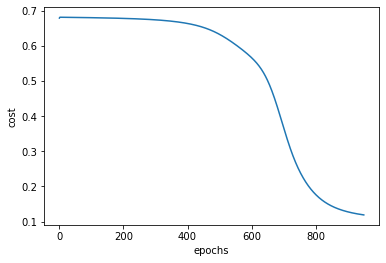

 Train Accuracy: 0.9731707317073168
confusion matrix:
[[200   5]
 [  6 199]]
 Test Accuracy: 0.975609756097561
confusion matrix:
[[40  1]
 [ 1 40]]


In [18]:
losses, w1, w2, w3 = train(train_x, train_y, 0.4, 120, 950, 0.001)
print(len(losses))
plot_losses(losses)
acc_train, y = predict(train_x, train_y, w1, w2, w3)
print(" Train Accuracy: " + str(acc_train))
conf_matrix(y, train_y)
acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
print(" Test Accuracy: " + str(acc_test))
conf_matrix(y_pred, test_y)

In [19]:
#Below are diferent combination of learning rate, num_epochs and batch_size

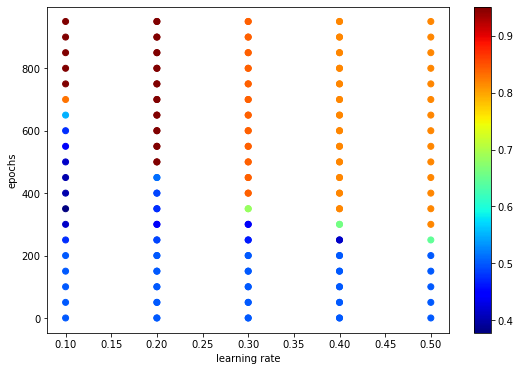

batch_size  11 learning rate 0.1 num_epochs 750 accuracy 0.9512195121951219


In [20]:
acc = []
batch_size = 11
allowed_loss = 0.1
for i in arange(0.1, 0.5, 0.05).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))

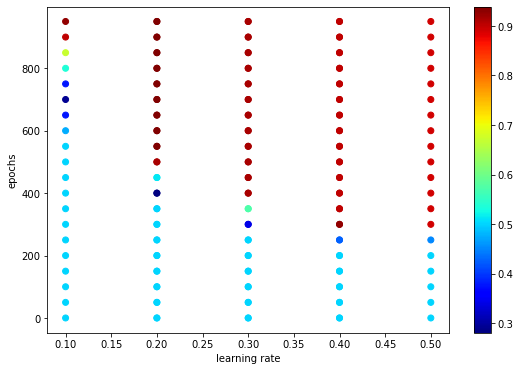

batch_size  21 learning rate 0.2 num_epochs 550 accuracy 0.9390243902439024


In [21]:
acc = []
batch_size = 21
allowed_loss = 0.1
for i in arange(0.1, 0.5, 0.05).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))

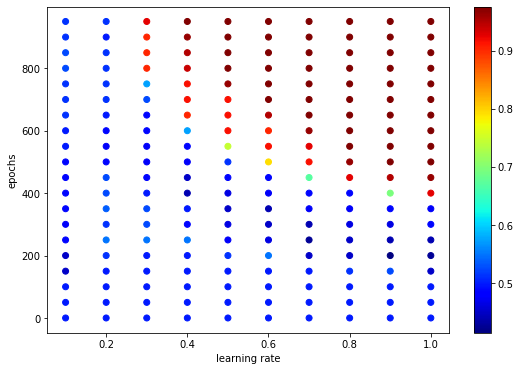

batch_size  41 learning rate 0.4 num_epochs 950 accuracy 0.975609756097561


In [22]:
acc = []
batch_size = 41
allowed_loss = 0.1
for i in arange(0.1, 1.1, 0.1).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))

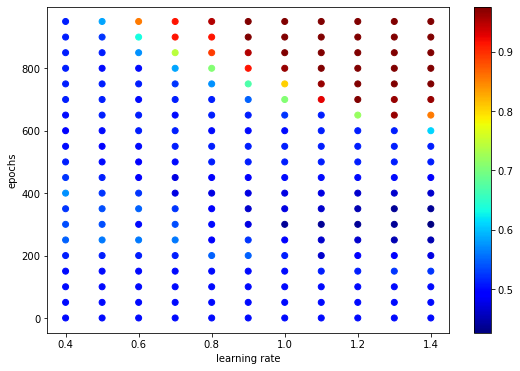

batch_size  82 learning rate 0.9 num_epochs 900 accuracy 0.975609756097561


In [23]:
acc = []
batch_size = 82
allowed_loss = 0.1
for i in arange(0.4, 1.5, 0.1).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))

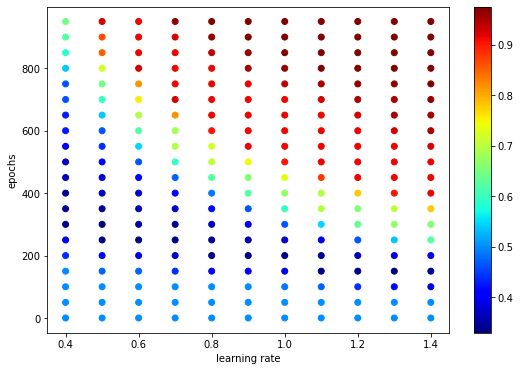

batch_size  140 learning rate 0.8 num_epochs 950 accuracy 0.975609756097561


In [24]:
acc = []
batch_size = 140
allowed_loss = 0.1
for i in arange(0.4, 1.5, 0.1).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))

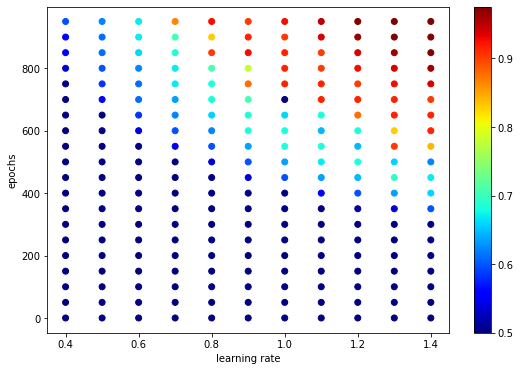

batch_size  210 learning rate 1.2 num_epochs 950 accuracy 0.975609756097561


In [25]:
acc = []
batch_size = 210
allowed_loss = 0.1
for i in arange(0.4, 1.5, 0.1).round(1):
    lr = i
    for j in range(0, 1000, 50):
        layers = [10, 10, 1]
        num_epochs = j
        losses, w1, w2, w3 = train(train_x, train_y, lr, batch_size, num_epochs, allowed_loss)
        acc_test, y_pred = predict(test_x, test_y, w1, w2, w3)
        acc.append([i, j, acc_test])
plot_acc(acc)
acc.sort(key=lambda x: x[2], reverse=True)
print("batch_size  " + str(batch_size) + " learning rate " + str(acc[0][0]) + " num_epochs " + str(acc[0][1]) + " accuracy " + str(acc[0][2]))